In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [124]:
df = pd.read_csv('Downloads/Avproject/avocado.csv')

In [125]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [126]:
df.shape

(18249, 14)

In [127]:
np.where(df.index.duplicated())

(array([], dtype=int64),)

In [128]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [129]:
df.duplicated().sum()

0

In [130]:
df.isnull().values.any()

False

In [131]:
df['Year'], df['Month'],  df['Day'] = df['Date'].str.split('-').str

In [132]:
df.set_index('Date',inplace=True)

In [133]:
df.drop('year',axis=1,inplace=True)

In [134]:
df.head(2)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,Day
Date,,,,,,,,,,,,,,
2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,2015,12,27
2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,2015,12,20


In [135]:
types=df.groupby('type')['Total Volume'].sum()

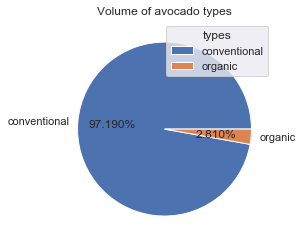

In [136]:
values=[types['conventional'],types['organic']]
labels=['conventional','organic']
plt.pie(values,labels=labels,autopct='%.3f%%')
plt.legend(title='types',loc='best')
plt.title('Volume of avocado types');

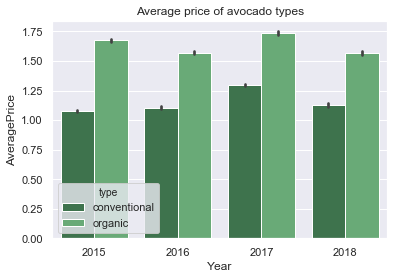

In [137]:
sns.set(style="darkgrid")
sns.barplot(x='Year',y='AveragePrice',hue='type',data=df,palette="Greens_d").set_title('Average price of avocado types');

In [138]:
df['SmallBags']=df.index
df['LargeBags']=df.index

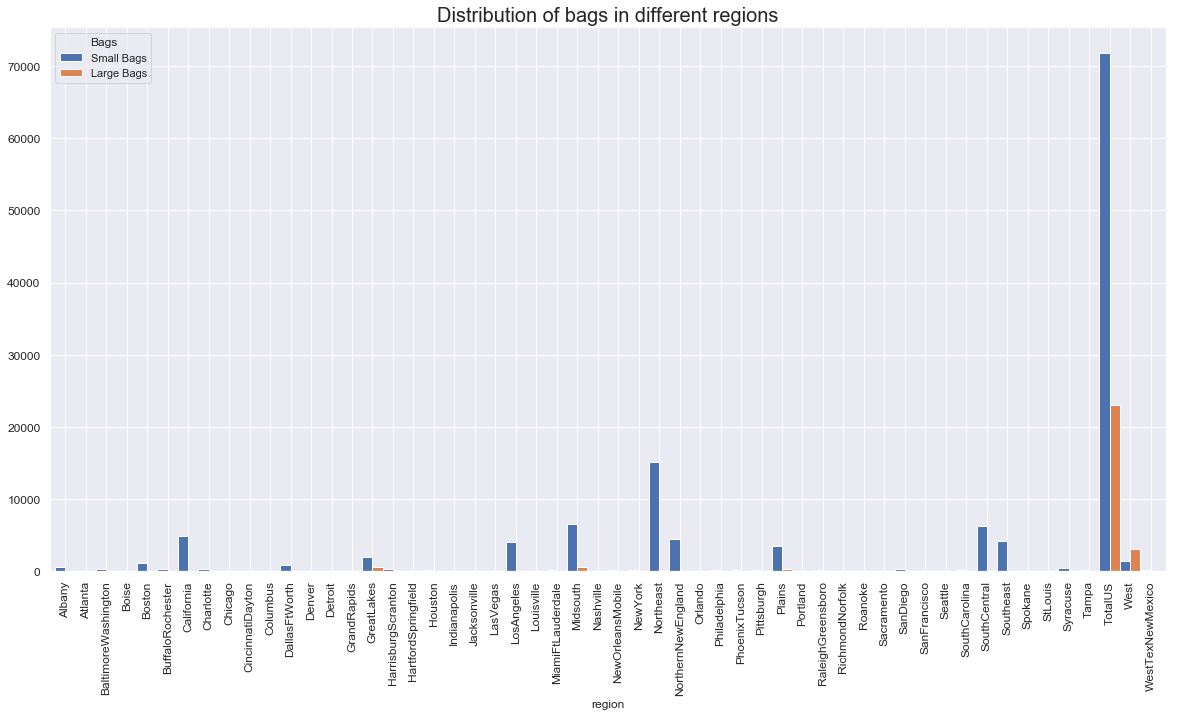

In [154]:
Bags = df[['Small Bags', 'Large Bags']].groupby(df.region).agg()
Bags.plot(kind='bar',fontsize = 12,width=1,figsize=(20,10))
plt.legend(title='Bags', loc='upper left')
plt.title('Distribution of bags in different regions',fontsize=20)
plt.show();